In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix


%matplotlib inline

c:\Users\SKRZEP\Desktop\MNIST\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


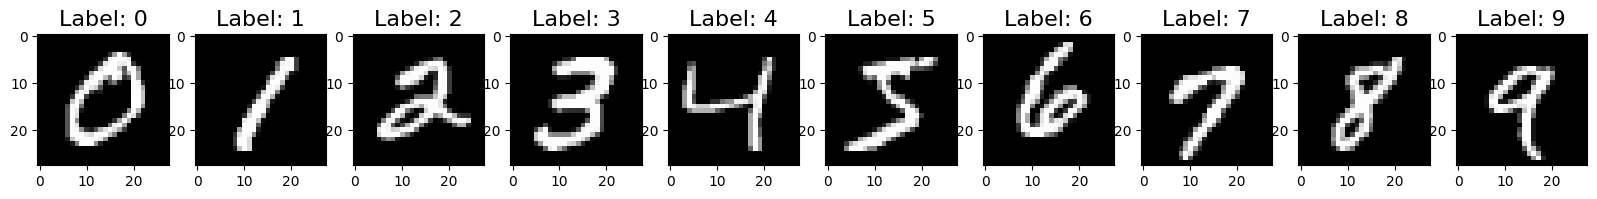

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Obrabianie danych:

In [7]:
#Normalize Data
x_train = x_train /255.0
x_test = x_test/255.0

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [9]:
# MODEL
'''
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\SKRZEP\Desktop\MNIST\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train

In [10]:
batch_size = 512
epochs= 30
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7884 - loss: 0.6998
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9479 - loss: 0.1711
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9633 - loss: 0.1197
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9702 - loss: 0.0972
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9744 - loss: 0.0831
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9772 - loss: 0.0733
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9792 - loss: 0.0667
Epoch 8/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9808 - loss: 0.0633
Epoch 9/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9824 - loss: 0.0572
Epoch 10/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9830 - loss: 0.0546
Epoch 11/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9844 - loss: 0.0523
Epoch 12/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 

EVALUATE

In [11]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("TEST LOSS: {}, TEST ACCCURACY: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9916 - loss: 0.0243
TEST LOSS: 0.02431696653366089, TEST ACCCURACY: 0.991599977016449


In [12]:
y_prep = model.predict(x_test)
y_prep_classes = np.argmax(y_prep, axis=1)
print(y_prep)
print(y_prep_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[3.8515049e-09 1.5090702e-10 3.1411885e-06 ... 9.9999583e-01
  5.1014806e-09 3.1441726e-07]
 [1.1708496e-06 3.9211800e-06 9.9999118e-01 ... 5.3363727e-11
  1.0109684e-06 1.9999139e-12]
 [3.9612367e-08 9.9985313e-01 1.4316921e-06 ... 4.4067587e-05
  4.5379993e-06 7.5802404e-08]
 ...
 [5.1507559e-11 4.0094996e-08 4.4483930e-11 ... 1.4509932e-07
  6.3046818e-06 7.4015372e-07]
 [5.3450094e-07 6.8267939e-13 1.1304027e-10 ... 1.7968306e-12
  2.1242628e-04 1.7971701e-08]
 [9.5845701e-07 7.7362290e-11 3.6895713e-07 ... 5.1288622e-12
  4.7549861e-06 3.6349562e-10]]
[7 2 1 ... 4 5 6]


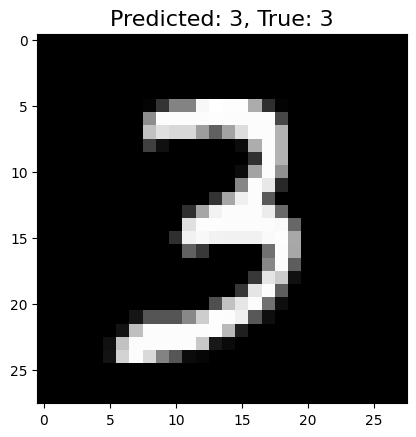

In [13]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_prep_class = y_prep_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_prep_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

Text(0.5, 1.0, 'Confusion Matrix')

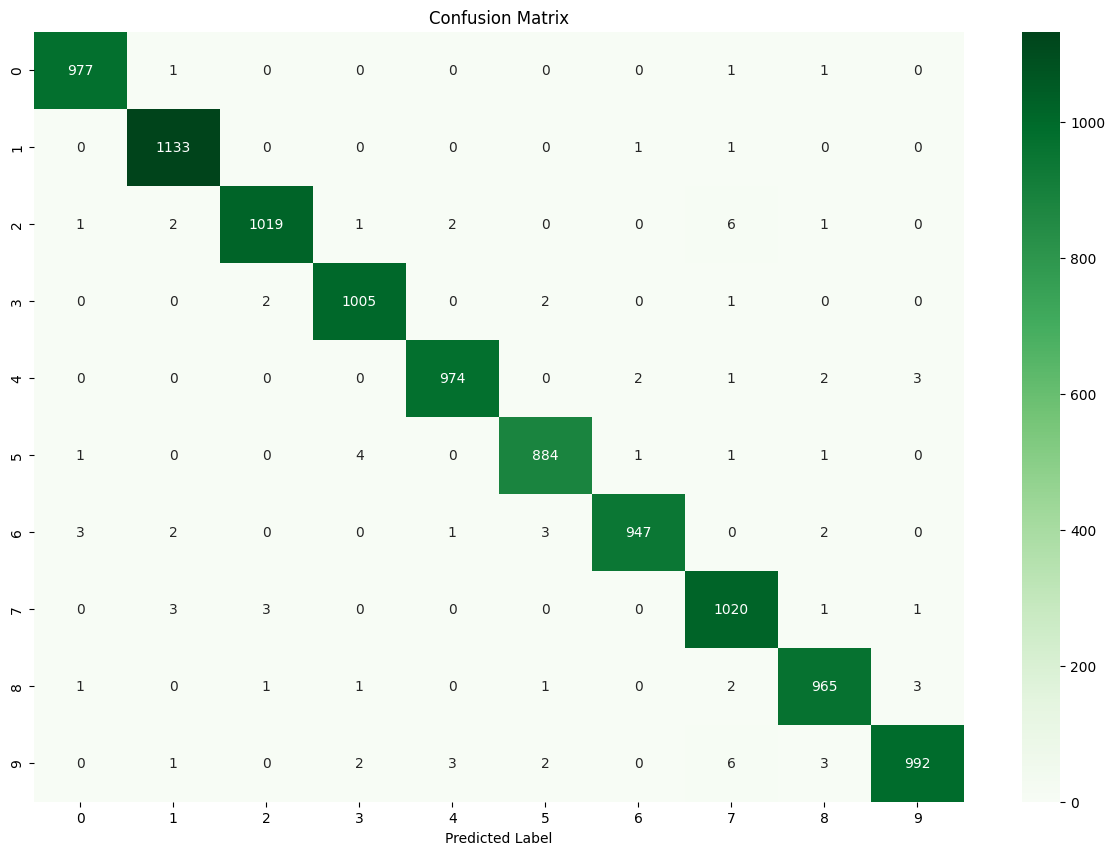

In [14]:
# Confusion Matrix

confusion_mtx = confusion_matrix(y_true, y_prep_classes)

#plot
fig , ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Greens')
ax.set_xlabel('Predicted Label')
ax.set_title('Confusion Matrix')
